# **Approach**


For the final project, we are utilizing two datasets: Recall and Inspection. Our approach begins with data cleaning and preprocessing for both datasets. Following this, we will perform Exploratory Data Analysis (EDA) on each dataset individually to gain insights and address the respective hypothesis questions. Finally, we will analyze the hypothesis questions for the combined dataset to uncover relationships and trends across the two datasets.

# **About The Dataset**

The data source for our final project was selected from the three options provided by the professor. We chose Option 2 which is FDA- You are going to go to one of the FDA dashboard and use the datasets to address one or more hypotheses and one or more questions.

# **Recal Dataset**

A recall is a process initiated by a manufacturer, distributor, or regulatory authority (such as the FDA) to remove a product from the market due to concerns about its safety, effectiveness, or regulatory compliance. Recalls typically occur when a product poses a risk to public health or fails to meet quality or labeling standards

Columns: 17

Rows: 93834



FEI Number: A unique identifier for the recalling firm.

Recalling Firm Name: Name of the company recalling the product.

Product Type: The category of the product

Product Classification: Indicates the risk class of the product

Status: Current status of the recall

Distribution Pattern: Description of the geographic distribution of the product.

Recalling Firm City and State: Location details of the recalling firm.

Center Classification Date: The date the product was classified for recall.

Reason for Recall: The issue or defect that prompted the recall.

Product Description: A detailed description of the recalled product.

Event ID: A unique identifier for the recall event.

Event Classification: Classification of the recall event based on severity

Product ID: Unique identifier for the product involved.

Center: Regulatory center overseeing the recall

Recall Details: A URL linking to additional information about the recall




DataSet Link: https://datadashboard.fda.gov/ora/cd/recalls.htm



# **Inspection Dataset**

An inspection is a systematic process conducted by regulatory authorities or organizations to assess whether facilities, products, or operations comply with established laws, regulations, and standards. Inspections aim to ensure public health, safety, and quality across various industries, including food, healthcare, pharmaceuticals, and manufacturing.

Columns: 15

Rows: 304294





FEI Number: A unique identifier for the inspected entity or facility.

Legal Name: The official name of the inspected organization or company.

City, State, and Zip: Location details of the facility.

Country/Area: Geographic region of the facility.

Fiscal Year: The year in which the inspection was conducted.

Inspection ID: A unique identifier for the specific inspection event.

Posted Citations: Indicates whether citations (violations) were posted as a result of the inspection.

Inspection End Date: The date the inspection concluded.

Classification:
Voluntary Action Indicated (VAI): Minor issues requiring corrective actions.
No Action Indicated (NAI): The facility met all standards, no issues found.

Project Area: Focus area of the inspection, such as: Foodborne biological  hazards (food safety issues). Monitoring of veterinary products (animal health and drug safety).

Product Type: The category of products involved, such as food, cosmetics, biologics, or veterinary items.

Additional Details: Extra notes or classifications related to the inspection.
FMD-145 Date: Likely related to follow-up or compliance activities (often blank or specific).






Dataset Link: https://datadashboard.fda.gov/ora/cd/inspections.htm

# **Step 1: Importing necessary modules**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 18)
pd.set_option('display.max_rows', 304295)

# **Step 2: Loading the dataset**


In [2]:
Inspection = pd.read_excel("52cc78d9-9486-499b-b044-e10999175879.xlsx")

In [3]:
Inspection.head() # display first 5 rows

,FEI Number,Legal Name,City,State,Zip,Country/Area,Fiscal Year,Inspection ID,Posted Citations,Inspection End Date,Classification,Project Area,Product Type,Additional Details,FMD-145 Date
0,3003867915,By George Food Specialties Inc.,Ballston Lake,New York,12019,United States,2025,1254941,Yes,2024-11-25,Voluntary Action Indicated (VAI),Foodborne Biological Hazards,Food/Cosmetics,FSVP,-
1,3027556847,Mayo Clinic Hospital Rochester,Rochester,Minnesota,55901,United States,2025,1255020,No,2024-11-22,No Action Indicated (NAI),Blood and Blood Products,Biologics,-,2024-11-26 00:00:00
2,3012992285,AdventHealth Lab,Celebration,Florida,34747,United States,2025,1255081,No,2024-11-22,No Action Indicated (NAI),Blood and Blood Products,Biologics,-,-
3,3010741116,Purina Animal Nutrition LLC,Camp Hill,Pennsylvania,17011,United States,2025,1254947,No,2024-11-21,No Action Indicated (NAI),"Monitoring of Marketed Animal Drugs, Feed, and...",Veterinary,-,-
4,2514731,Franklin Feed & Supply Co,Chambersburg,Pennsylvania,17201,United States,2025,1255013,Yes,2024-11-21,Voluntary Action Indicated (VAI),"Monitoring of Marketed Animal Drugs, Feed, and...",Veterinary,-,-


In [4]:
Recall = pd.read_excel("d8a63711-6b98-4259-b153-1fde1c55badb.xlsx")

In [5]:
Recall.head()

,FEI Number,Recalling Firm Name,Product Type,Product Classification,Status,Distribution Pattern,Recalling Firm City,Recalling Firm State,Recalling Firm Country,Center Classification Date,Reason for Recall,Product Description,Event ID,Event Classification,Product ID,Center,Recall Details
0,3017262132,Grand Central Bakery FRE Co Inc,Food/Cosmetics,Class I,Ongoing,Distributed in OR and WA.,Portland,Oregon,United States,2024-11-30,Undeclared egg,"U-BAKE Apple Pie, frozen product and packaged ...",95623,Class I,210818,CFSAN,https://www.accessdata.fda.gov/scripts/ires/?P...
1,3017262132,Grand Central Bakery FRE Co Inc,Food/Cosmetics,Class I,Ongoing,Distributed in OR and WA.,Portland,Oregon,United States,2024-11-30,Undeclared egg,"U-BAKE Pie Crust (Pastry Round), frozen produc...",95623,Class I,210819,CFSAN,https://www.accessdata.fda.gov/scripts/ires/?P...
2,3017262132,Grand Central Bakery FRE Co Inc,Food/Cosmetics,Class I,Ongoing,Distributed in OR and WA.,Portland,Oregon,United States,2024-11-30,Undeclared egg,"U-BAKE Marionberry Pie, frozen product and pac...",95623,Class I,210820,CFSAN,https://www.accessdata.fda.gov/scripts/ires/?P...
3,3017262132,Grand Central Bakery FRE Co Inc,Food/Cosmetics,Class I,Ongoing,Distributed in OR and WA.,Portland,Oregon,United States,2024-11-30,Undeclared egg,"U-BAKE Chicken Pot Pie, frozen product and pac...",95623,Class I,210822,CFSAN,https://www.accessdata.fda.gov/scripts/ires/?P...
4,3003604053,Smith & Nephew Inc.,Devices,Class II,Ongoing,Worldwide - US Nationwide distribution in the ...,Andover,Massachusetts,United States,2024-11-29,Sterile barrier breach due to inadequate packa...,"BIORAPTOR Suture Anchors. Tendon/ligament, non...",95654,Class II,210894,CDRH,https://www.accessdata.fda.gov/scripts/ires/?P...


# **Step 3: Data Cleaning and Data Preprocessing**

## (i)  checking the info of the data

In [6]:
Inspection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304294 entries, 0 to 304293
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FEI Number           304294 non-null  int64         
 1   Legal Name           304294 non-null  object        
 2   City                 304293 non-null  object        
 3   State                304294 non-null  object        
 4   Zip                  304294 non-null  object        
 5   Country/Area         304294 non-null  object        
 6   Fiscal Year          304294 non-null  int64         
 7   Inspection ID        304294 non-null  int64         
 8   Posted Citations     304294 non-null  object        
 9   Inspection End Date  304294 non-null  datetime64[ns]
 10  Classification       304294 non-null  object        
 11  Project Area         304294 non-null  object        
 12  Product Type         304294 non-null  object        
 13  Additional Det

In [7]:
Recall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93834 entries, 0 to 93833
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   FEI Number                  93834 non-null  object        
 1   Recalling Firm Name         93834 non-null  object        
 2   Product Type                93834 non-null  object        
 3   Product Classification      93834 non-null  object        
 4   Status                      93834 non-null  object        
 5   Distribution Pattern        93833 non-null  object        
 6   Recalling Firm City         93834 non-null  object        
 7   Recalling Firm State        93834 non-null  object        
 8   Recalling Firm Country      93834 non-null  object        
 9   Center Classification Date  93834 non-null  datetime64[ns]
 10  Reason for Recall           93834 non-null  object        
 11  Product Description         93834 non-null  object    

# (ii) To check any missing values are present in the columns


In [8]:
missing_values = Recall.isnull().sum() # Checking missing values for recall dataset
print(missing_values)

FEI Number                    0
Recalling Firm Name           0
Product Type                  0
Product Classification        0
Status                        0
Distribution Pattern          1
Recalling Firm City           0
Recalling Firm State          0
Recalling Firm Country        0
Center Classification Date    0
Reason for Recall             0
Product Description           0
Event ID                      0
Event Classification          0
Product ID                    0
Center                        0
Recall Details                0
dtype: int64


In [9]:
missing_values = Inspection.isnull().sum() # Checking missing values for inspection dataset
print(missing_values)

FEI Number             0
Legal Name             0
City                   1
State                  0
Zip                    0
Country/Area           0
Fiscal Year            0
Inspection ID          0
Posted Citations       0
Inspection End Date    0
Classification         0
Project Area           0
Product Type           0
Additional Details     0
FMD-145 Date           0
dtype: int64


In [10]:
Recall['Recalling Firm State'] = Recall['Recalling Firm State'].replace('-', 'Other Countries')


In [11]:
Inspection['State'] = Inspection['State'].replace('-', 'Other Countries')

# (iii) Checking duplicates


In [12]:
# Finding duplicates in the Inspection dataset
duplicate_rows_inspection = Inspection[Inspection.duplicated()]
print("Number of duplicate rows in Inspection dataset:", len(duplicate_rows_inspection))


# Finding duplicates in Recall dataset
duplicate_rows_recall = Recall[Recall.duplicated()]
print("Number of duplicate rows in Recall dataset:", len(duplicate_rows_recall))


Number of duplicate rows in Inspection dataset: 0
Number of duplicate rows in Recall dataset: 0


# **Observation**

The "Distribution Pattern" column for the Recall dataset does have a missing value; we did not drop nor replace the row, since this is irrelevant to the analysis we will be running. We can also spot some rows containing " -" as a substitute for NaN values in the "Recalling Firm State" column; these belong to entries corresponding to the names of other countries, such as Germany or Switzerland, in the "Country" column. To address this, for those rows, we replaced "-" in the "Recalling Firm State" column with "Other Country."


In the Inspection dataset, the "City" column contains NaN values while there are "-" instead of a NaN values in the "Additional Details," "FMD-145 Date," and "State." For the "City," "Additional Details," and "FMD-145 Date," we have not replaced/dropped any rows because their NaN values do not effect our analysis. In the "State" column, the rows with "-" correspond to entries in the "Country" column that have names of other countries such as Germany or Switzerland. In these cases, we replaced "-" in the "State" column with "Other Country".


There were no duplicate entries in either dataset.

# **Recall**

# **EDA**

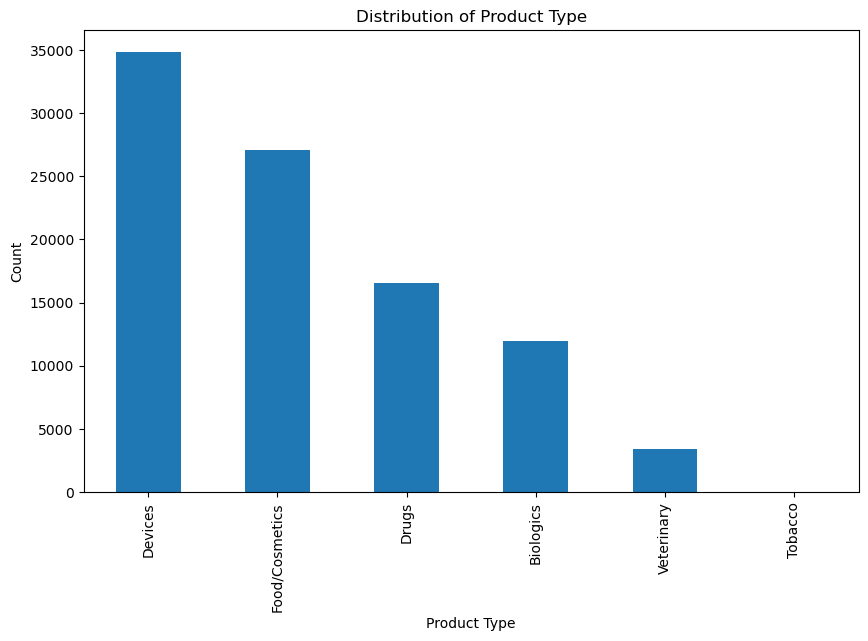

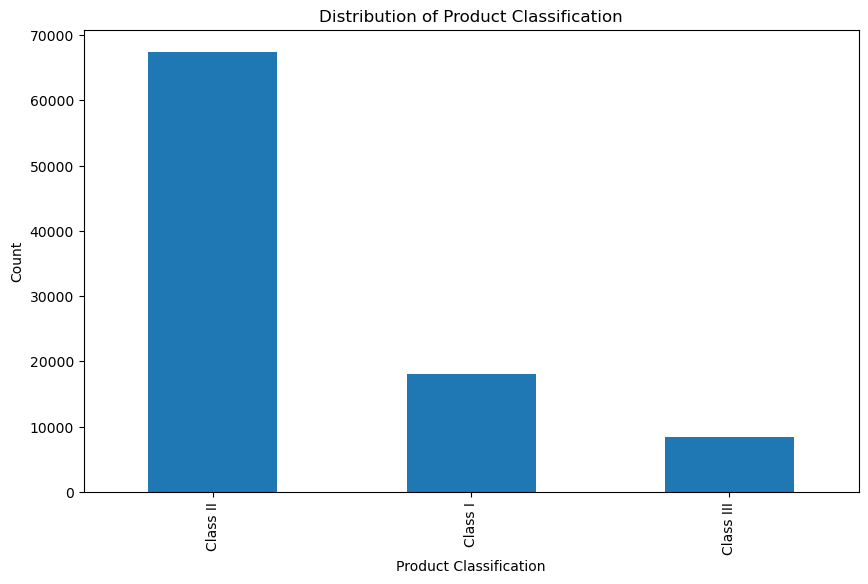

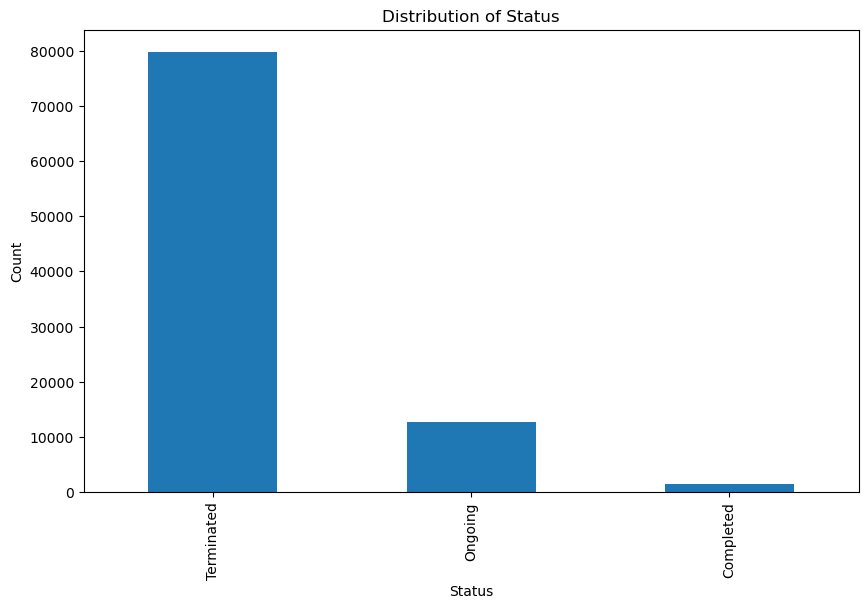

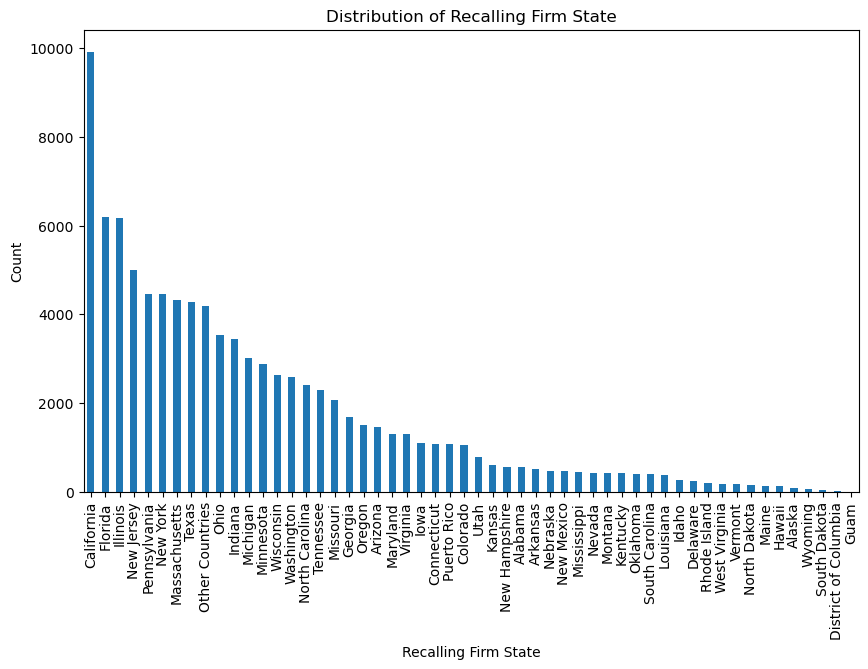

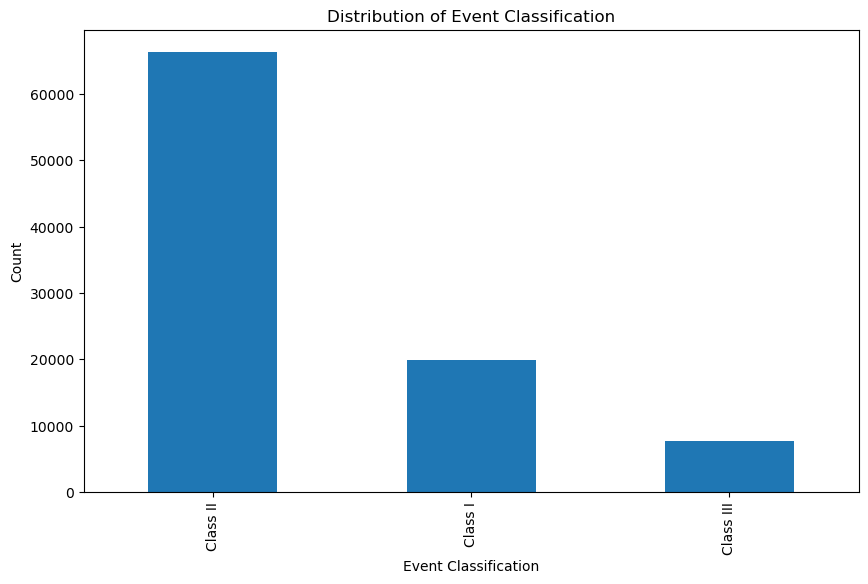

In [13]:
# Summary statistics for numeric columns
#numeric_summary = Recall.describe()

# Unique value counts for categorical columns
categorical_summary = Recall.select_dtypes(include='object').nunique()

# Distribution of key categorical columns
key_categorical_columns = ['Product Type', 'Product Classification', 'Status',
                           'Recalling Firm State', 'Event Classification']

for col in key_categorical_columns:
    plt.figure(figsize=(10, 6))
    Recall[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


# **Observation**

(i) The bar chart shows Devices leading with over 35,000 recalls, followed by Food/Cosmetics at 25,000, and Drugs at 15,000, highlighting safety concerns in these categories. Biologics and Veterinary have fewer recalls, while Tobacco shows negligible representation.

(ii) The bar chart shows Class II recalls dominating with nearly 70,000, indicating a focus on moderate health risks. Class I follows with 20,000 recalls, reflecting serious safety concerns, while Class III has fewer than 10,000, suggesting less focus on minor violations.

(iii) The bar chart shows most recalls (nearly 80,000) are "Terminated," reflecting successful resolution. A smaller portion is "Ongoing," indicating active cases, while "Completed" recalls are minimal.

(iv) The bar chart shows California leading with nearly 10,000 recalls, followed by industrial states like Illinois, Florida, and Texas (4,000 - 7,000 recalls). Mid-tier states like Michigan and Massachusetts show moderate activity, while Delaware, Hawaii, and Wyoming report minimal recalls.

(v) The bar chart shows Class II events dominating with over 60,000, indicating most recalls involve moderate risks. Class I follows with 20,000, highlighting serious health concerns, while Class III, with under 10,000, reflects minor regulatory violations.


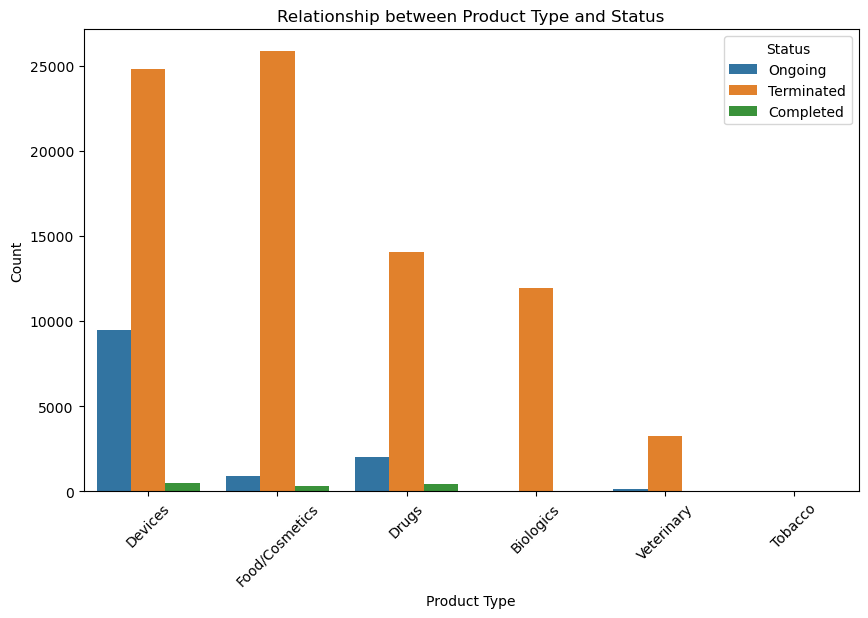

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=Recall, x='Product Type', hue='Status', order=Recall['Product Type'].value_counts().index)
plt.title('Relationship between Product Type and Status')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

# **Observation**

The bar chart shows "Terminated" recalls dominating across all product types, reflecting effective case resolution. Devices and Food/Cosmetics lead in recall counts, with Devices having the highest "Ongoing" recalls, indicating active issues. "Completed" recalls are minimal, likely due to procedural transitions to "Terminated."

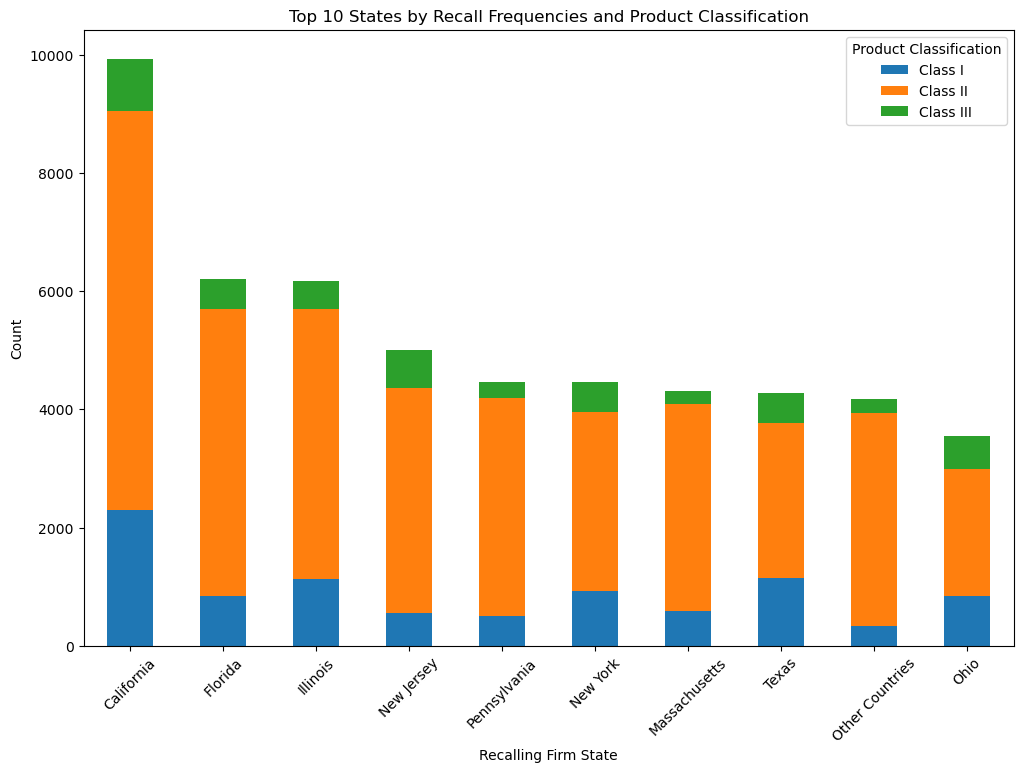

In [15]:
# Calculate the count of recalls by state and product classification
state_product_analysis = Recall.groupby(['Recalling Firm State', 'Product Classification']).size().unstack(fill_value=0)

# Visualize the top 10 states with the highest recall frequencies
top_states = state_product_analysis.sum(axis=1).sort_values(ascending=False).head(10)
top_states_data = state_product_analysis.loc[top_states.index]

top_states_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 10 States by Recall Frequencies and Product Classification')
plt.xlabel('Recalling Firm State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Product Classification')
plt.show()


# **Observation**

The bar chart shows California leading in recalls across all classifications, dominated by Class II recalls, followed by Class I and Class III. Florida, Illinois, and other industrial states follow similar patterns, with Class II consistently being the most frequent.

**Hypothesis: Do recall frequencies exhibit seasonal trends, and are specific recall reasons more common during certain periods?**

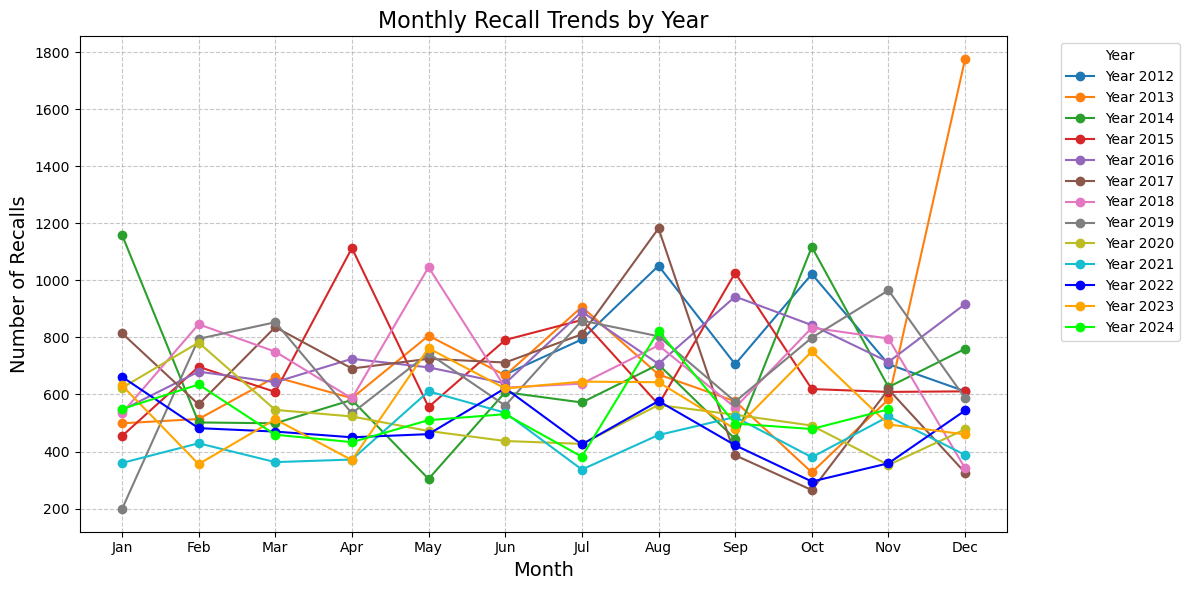

In [16]:
# Group data by 'Year' and 'Month' to calculate recall counts
Recall['Classification Date'] = pd.to_datetime(Recall['Center Classification Date'], errors='coerce')
Recall['Year'] = Recall['Classification Date'].dt.year
Recall['Month'] = Recall['Classification Date'].dt.month

# Aggregate recall data by year and month
monthly_trends = Recall.groupby(['Year', 'Month'])['Classification Date'].count().reset_index(name='Recall Count')

# Define a list of unique colors for each year
custom_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#0000ff", "#ffa500", "#00ff00", "#ff0000", "#800080",
    "#008080", "#ffc0cb", "#808080", "#ffff00", "#00ced1"
]

# Limit colors to the number of unique years in the dataset
unique_years = monthly_trends['Year'].unique()
num_years = len(unique_years)
colors = custom_colors[:num_years]

# Plotting Monthly Recall Trends using a line graph with markers
plt.figure(figsize=(12, 6))
for i, year in enumerate(unique_years):
    yearly_data = monthly_trends[monthly_trends['Year'] == year]
    plt.plot(
        yearly_data['Month'], yearly_data['Recall Count'],
        marker='o', label=f'Year {int(year)}', color=colors[i]
    )

plt.title('Monthly Recall Trends by Year', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Recalls', fontsize=14)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


# **Observation**

The chart shows a major spike in recalls in December 2013 (around 1800), far exceeding other months, suggesting a significant anomaly. Recall trends are steady across most years, with occasional spikes in April 2015 and July 2018. From 2020–2024, recall counts remain consistent (400–700), indicating improved management and fewer extreme events over time.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7612\2569742899.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

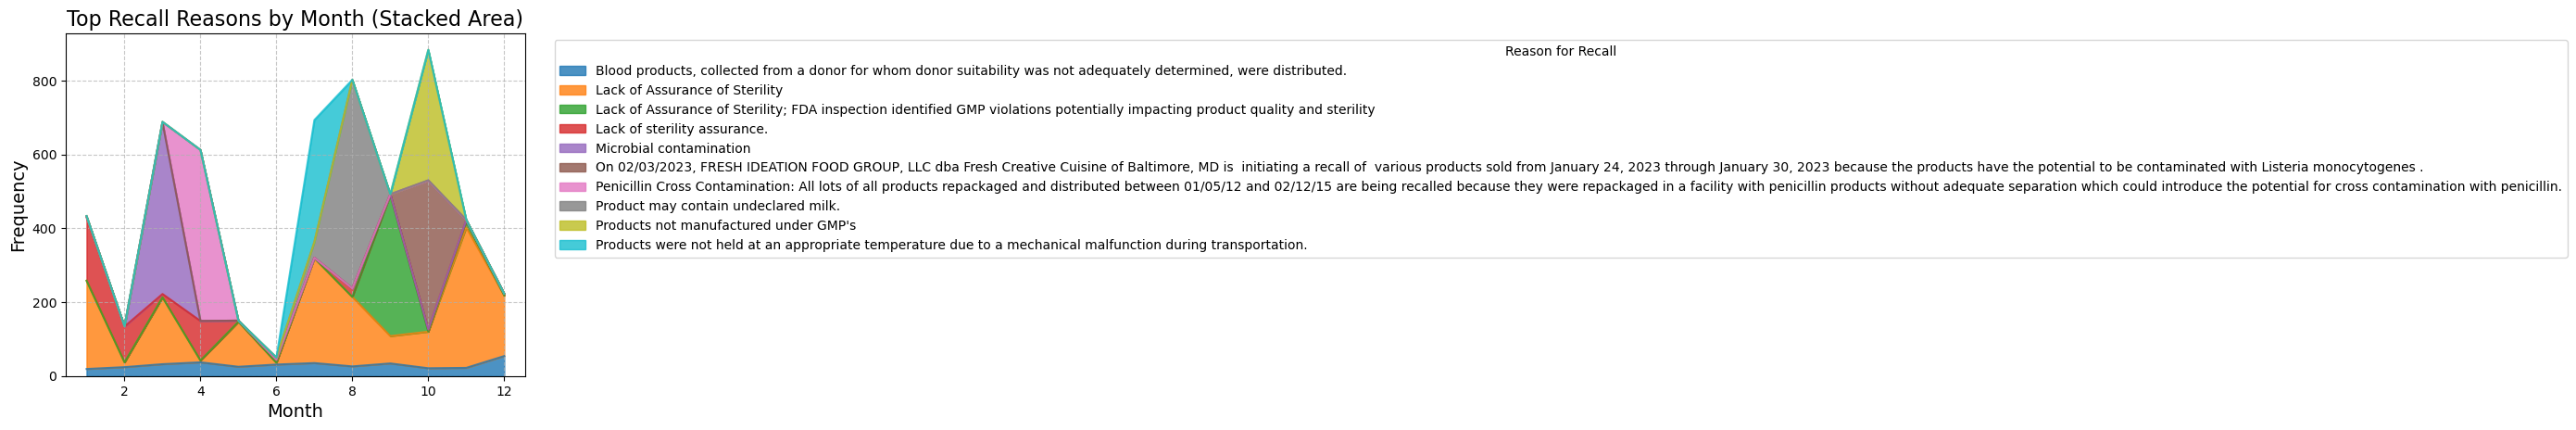

In [17]:
# Calculate frequencies by grouping 'Reason for Recall' and 'Month'
Recall['Month'] = pd.to_datetime(Recall['Center Classification Date'], errors='coerce').dt.month
frequency_data = Recall.groupby(['Month', 'Reason for Recall']).size().reset_index(name='Frequency')

# Identify top 10 recall reasons based on total frequency
top_reasons = frequency_data.groupby('Reason for Recall')['Frequency'].sum().nlargest(10).index
filtered_reasons = frequency_data[frequency_data['Reason for Recall'].isin(top_reasons)]

reason_pivot = filtered_reasons.pivot(index='Month', columns='Reason for Recall', values='Frequency').fillna(0)

plt.figure(figsize=(14, 8))
reason_pivot.plot(kind='area', stacked=True, alpha=0.8)
plt.title('Top Recall Reasons by Month (Stacked Area)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Reason for Recall', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **Observation**

The stacked area chart highlights significant recall spikes in August and October, driven largely by "Lack of Assurance of Sterility." February shows a notable peak in "Microbial Contamination," while "Blood Products" recalls cluster in January and February. Recall reasons are unevenly distributed across months, hinting at potential seasonality and operational factors influencing these trends.

# **Inspection**

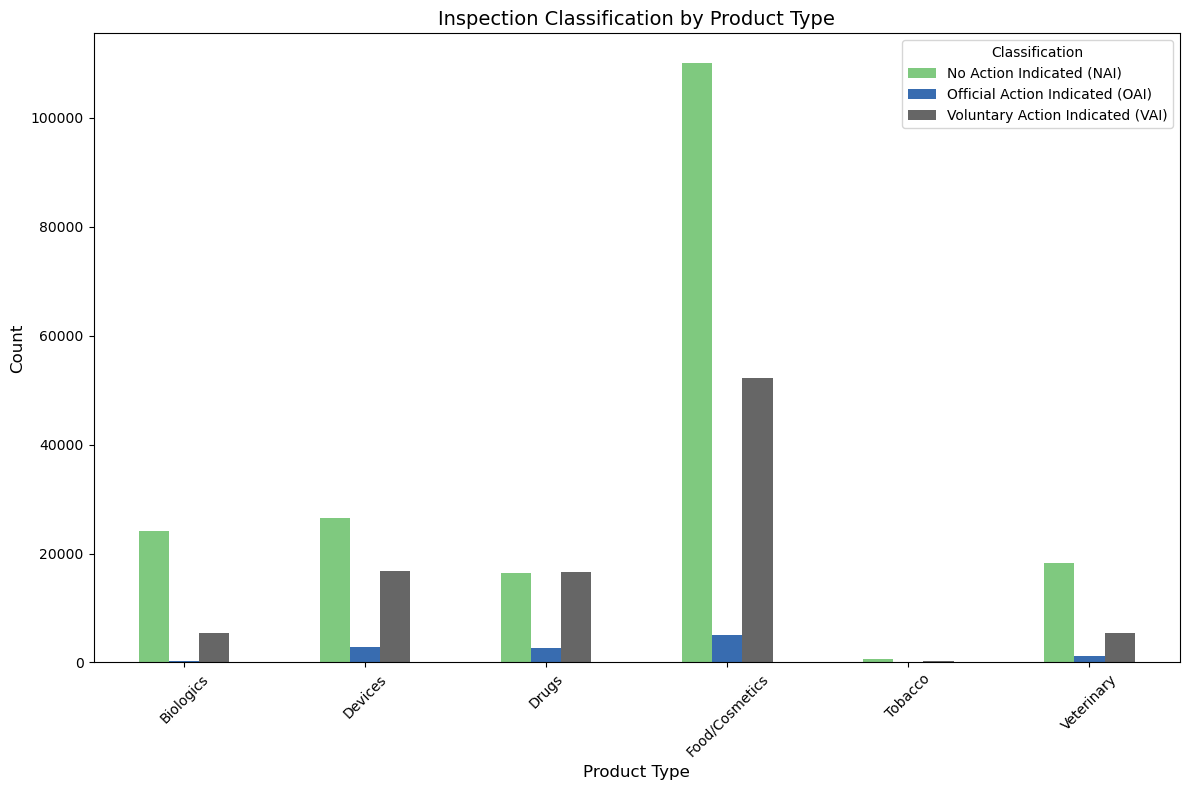

In [18]:
# Group data by 'Product Type' and 'Classification' and count occurrences
product_classification = Inspection.groupby(['Product Type', 'Classification']).size().unstack(fill_value=0)

product_classification.plot(kind='bar', figsize=(12, 8), colormap='Accent')
plt.title('Inspection Classification by Product Type', fontsize=14)
plt.xlabel('Product Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Classification', fontsize=10, loc='upper right')
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


Food/Cosmetics inspections are overwhelmingly resolved with NAI, reflecting strong compliance or low-risk findings.
Devices and Drugs show a more balanced distribution between NAI and VAI, with moderate proactive recall actions.
OAI is rare across all categories, indicating that severe regulatory action is infrequent.
Tobacco and Food/Cosmetics have significant voluntary actions, reflecting proactive measures to maintain safety and quality.
Veterinary products exhibit high compliance, as indicated by the dominance of NAI.

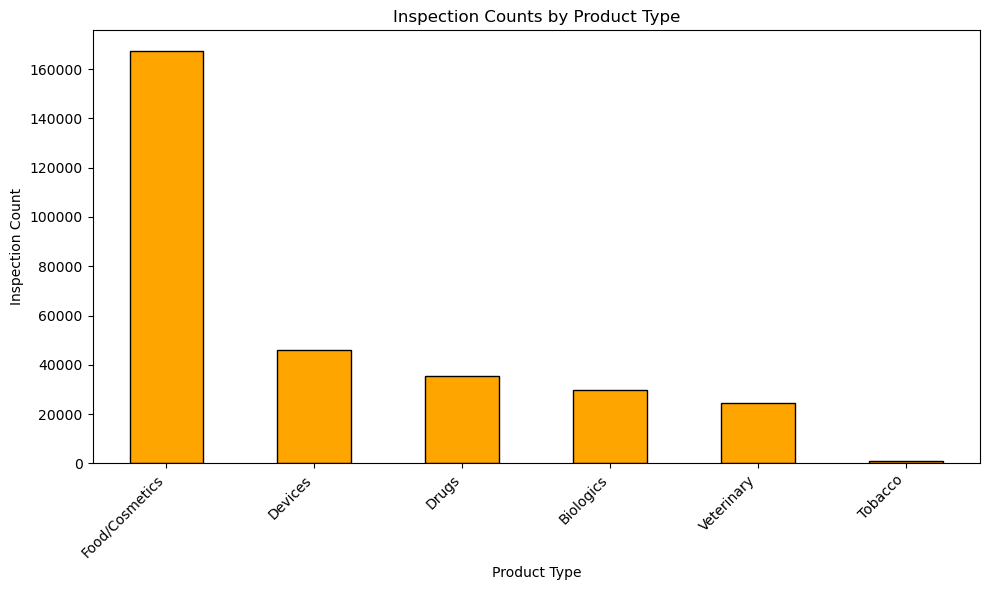

In [19]:
product_type_counts = Inspection['Product Type'].value_counts()

# Visualizing inspection counts by product type
plt.figure(figsize=(10, 6))
product_type_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Inspection Counts by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Inspection Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Food/Cosmetics Lead: The highest number of inspections (over 160,000), far exceeding all other categories.

Moderate Counts for Devices, Drugs, and Biologics: These categories have similar inspection counts, each around 40,000–50,000.

Low Inspections for Veterinary and Tobacco: Veterinary products have fewer inspections (~20,000), while Tobacco has minimal activity

**Hypothesis: Are certain states or regions more frequently inspected, and does this correlate with their industrial or economic activity?**

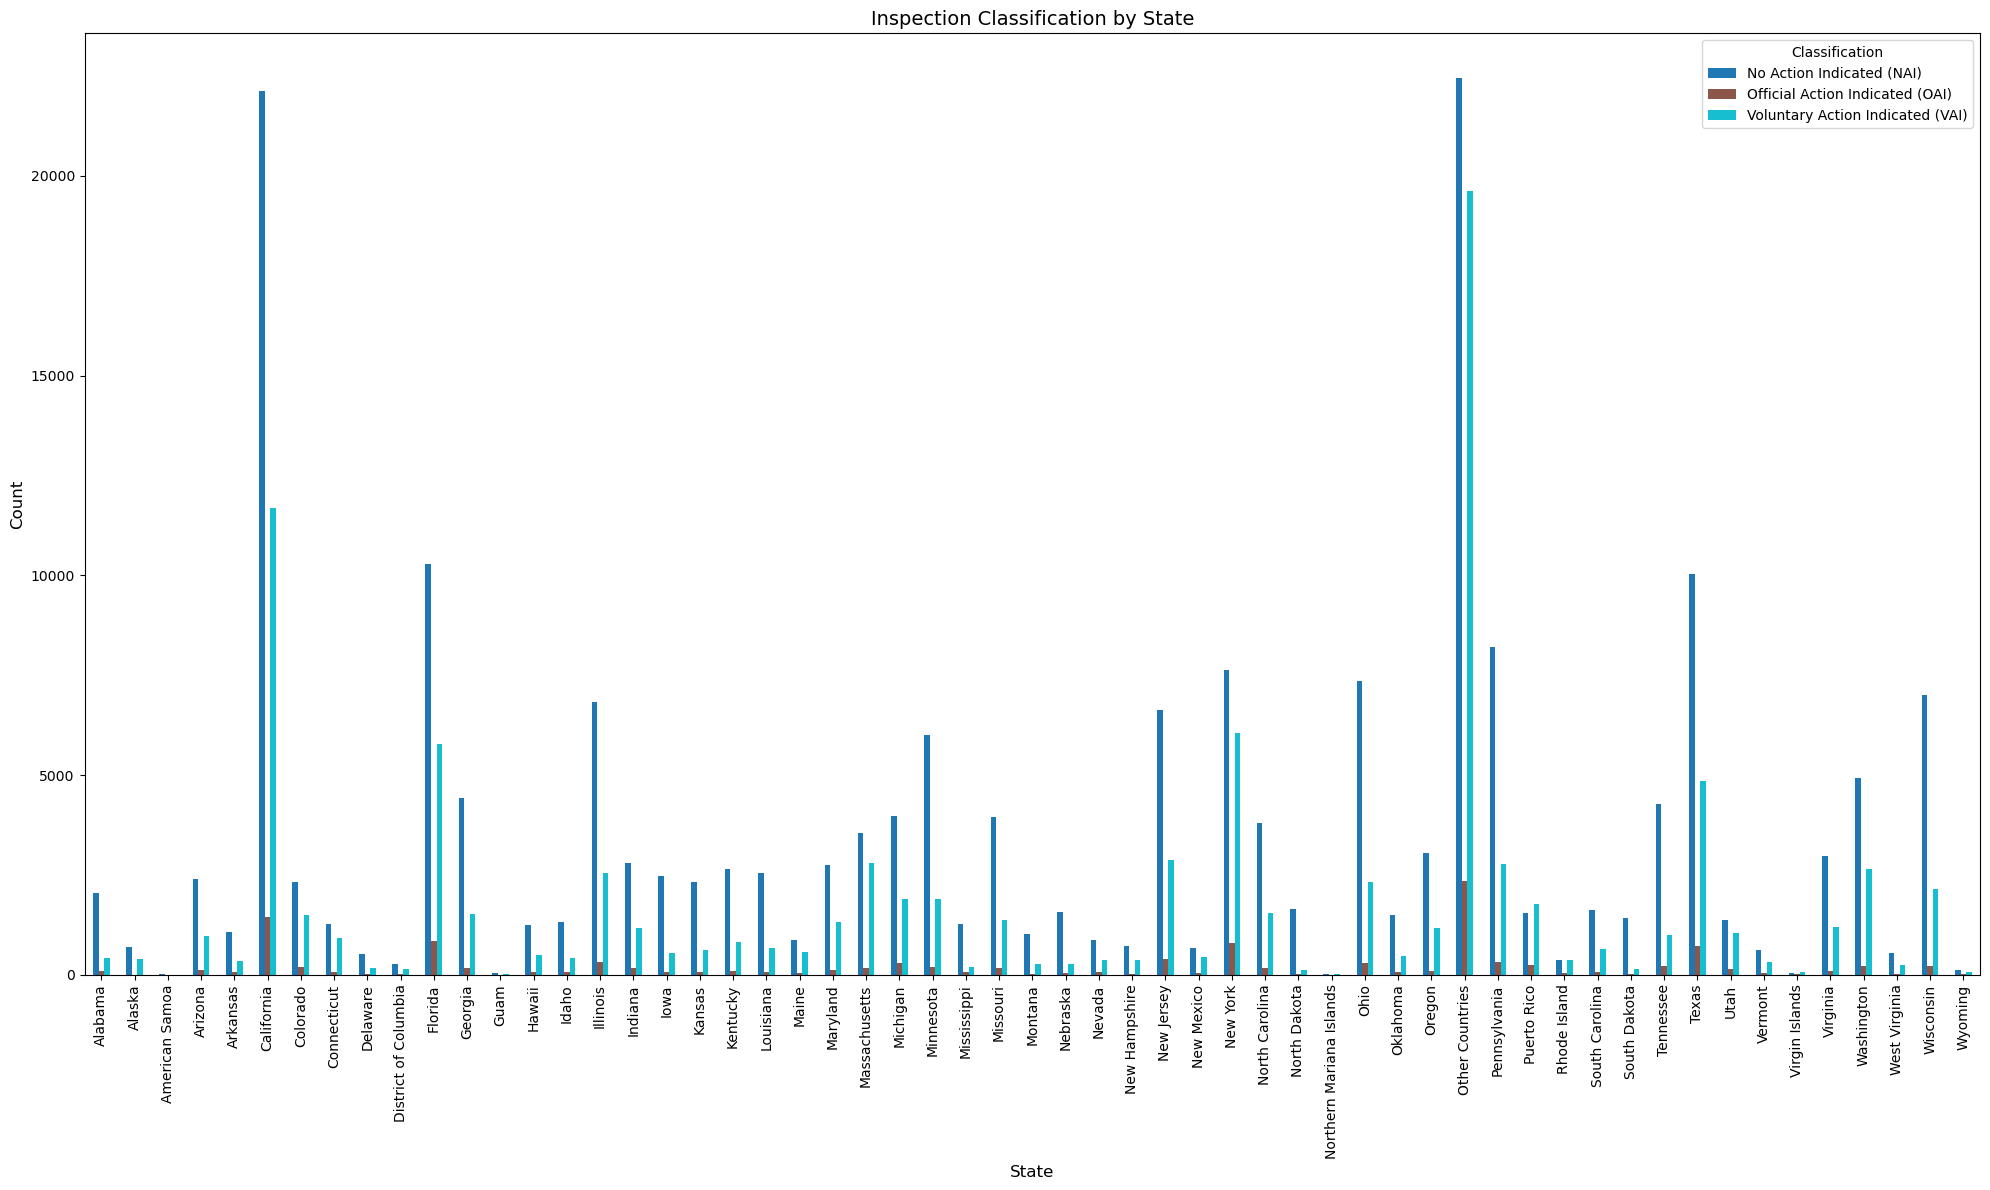

In [20]:
state_classification = Inspection.groupby(['State', 'Classification']).size().unstack(fill_value=0)

state_classification.plot(kind='bar', figsize=(20, 12), colormap='tab10')
plt.title('Inspection Classification by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Classification', fontsize=10, loc='upper right')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

California Leads Inspections: California has the highest count across all inspection classifications (NAI, OAI, VAI), indicating significant regulatory activity in the state.

High NAI Counts: Most states, including Texas, New York, and Florida, predominantly show "No Action Indicated (NAI)" classifications, reflecting fewer critical issues.

Moderate VAI Presence: Voluntary actions (VAI) are notable in states like New York and Texas, showing proactive measures by businesses.

Sparse OAI: Official actions (OAI) are minimal across all states, with small contributions, suggesting fewer severe violations.

"Other Countries": The high inspection count for "Other Countries" emphasizes the global scope of inspections, primarily classified under NAI.




**Do certain states focus on specific product types for inspections?**

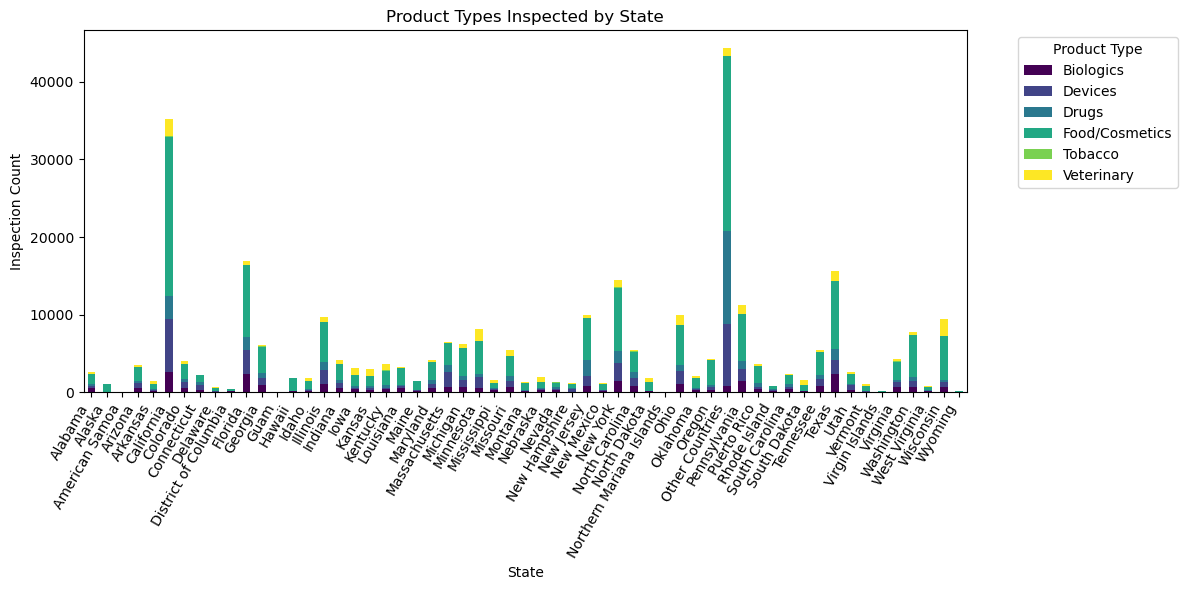

In [21]:
state_product_focus = Inspection.groupby(['State', 'Product Type']).size().unstack(fill_value=0)
state_product_focus.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Product Types Inspected by State')
plt.xlabel('State')
plt.ylabel('Inspection Count')
plt.xticks(rotation=60, ha='right')
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Food/Cosmetics Dominate Inspections: Across most states, Food/Cosmetics (green bars) represent the highest inspection counts, particularly in California and "Other Countries."

Drugs and Devices: Drugs (teal bars) and Devices (purple bars) consistently follow Food/Cosmetics in inspection counts, with notable activity in states like Texas and New York.

Minimal Tobacco and Veterinary Inspections: Tobacco (yellow) and Veterinary (light yellow) inspections are minimal across all states, with small contributions in select regions.

California and Other Countries Lead: These regions show the highest overall inspection activity, driven by Food/Cosmetics and Drugs.

# **Combined Dataset**

In [22]:
# Convert 'FEI Number' to the same type in both datasets
Inspection['FEI Number'] = Inspection['FEI Number'].astype(str)
Recall['FEI Number'] = Recall['FEI Number'].astype(str)

# Perform the inner merge to find overlap between inspections and recalls
inner_merged_df = pd.merge(Inspection, Recall, on="FEI Number", how="inner") #Inner Join: Keeps only rows where FEI Number matches in both datasets.

# Display basic info and a preview of the merged DataFrame
inner_merged_df.info(), inner_merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650800 entries, 0 to 650799
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   FEI Number                  650800 non-null  object        
 1   Legal Name                  650800 non-null  object        
 2   City                        650800 non-null  object        
 3   State                       650800 non-null  object        
 4   Zip                         650800 non-null  object        
 5   Country/Area                650800 non-null  object        
 6   Fiscal Year                 650800 non-null  int64         
 7   Inspection ID               650800 non-null  int64         
 8   Posted Citations            650800 non-null  object        
 9   Inspection End Date         650800 non-null  datetime64[ns]
 10  Classification              650800 non-null  object        
 11  Project Area                650800 non-

(None,
    FEI Number   Legal Name      City     State    Zip   Country/Area  \
 0  3010113510  TDBBS, LLC.  Richmond  Virginia  23231  United States   
 1  3010113510  TDBBS, LLC.  Richmond  Virginia  23231  United States   
 2  3010113510  TDBBS, LLC.  Richmond  Virginia  23231  United States   
 3  3010113510  TDBBS, LLC.  Richmond  Virginia  23231  United States   
 4  3010113510  TDBBS, LLC.  Richmond  Virginia  23231  United States   
 
    Fiscal Year  Inspection ID Posted Citations  ...  \
 0         2025        1250902               No  ...   
 1         2025        1250902               No  ...   
 2         2025        1250902               No  ...   
 3         2025        1250902               No  ...   
 4         2025        1250902               No  ...   
 
                                  Product Description Event ID  \
 0  Green Tripe: 2 lbs plastic bag, Best-Bully-Sti...    94732   
 1  12  Jumbo Bully Stick 8-pack  / 12-pack , 8 oz...    86854   
 2  Natural Cow E

**Hypothesis: facilities with recalls more likely to have inspections resulting in citations?**

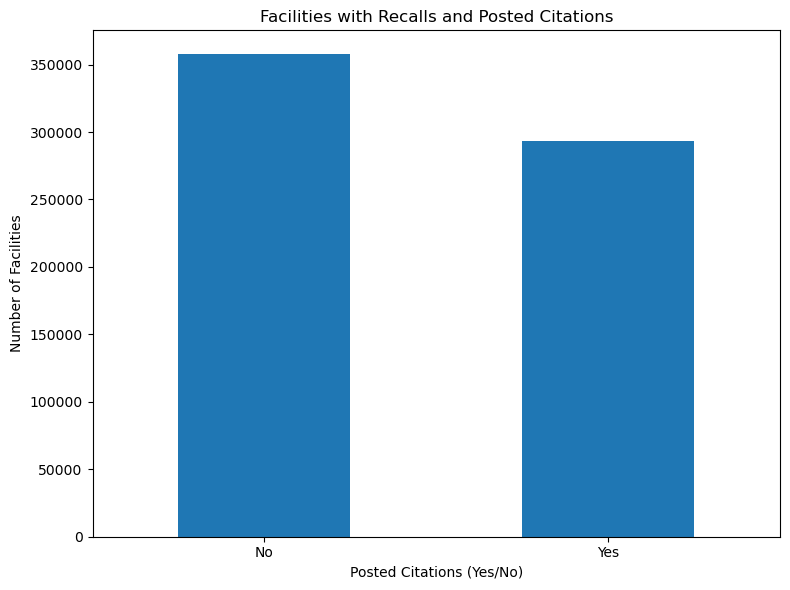

In [23]:
violations_summary = inner_merged_df.groupby('Posted Citations')['FEI Number'].count()

violations_summary.plot(kind='bar', figsize=(8, 6))
plt.title('Facilities with Recalls and Posted Citations')
plt.xlabel('Posted Citations (Yes/No)')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Facilities with recalls but no citations are slightly more numerous (~350,000 vs. ~300,000).

Citations are issued in a significant proportion (~46%), especially for critical recalls.

Facilities with recalls are not guaranteed to have inspections resulting in citations

**Hypothesis: Is there a correlation between the Product Type of a recalled product and the Project Area of its corresponding inspection?**

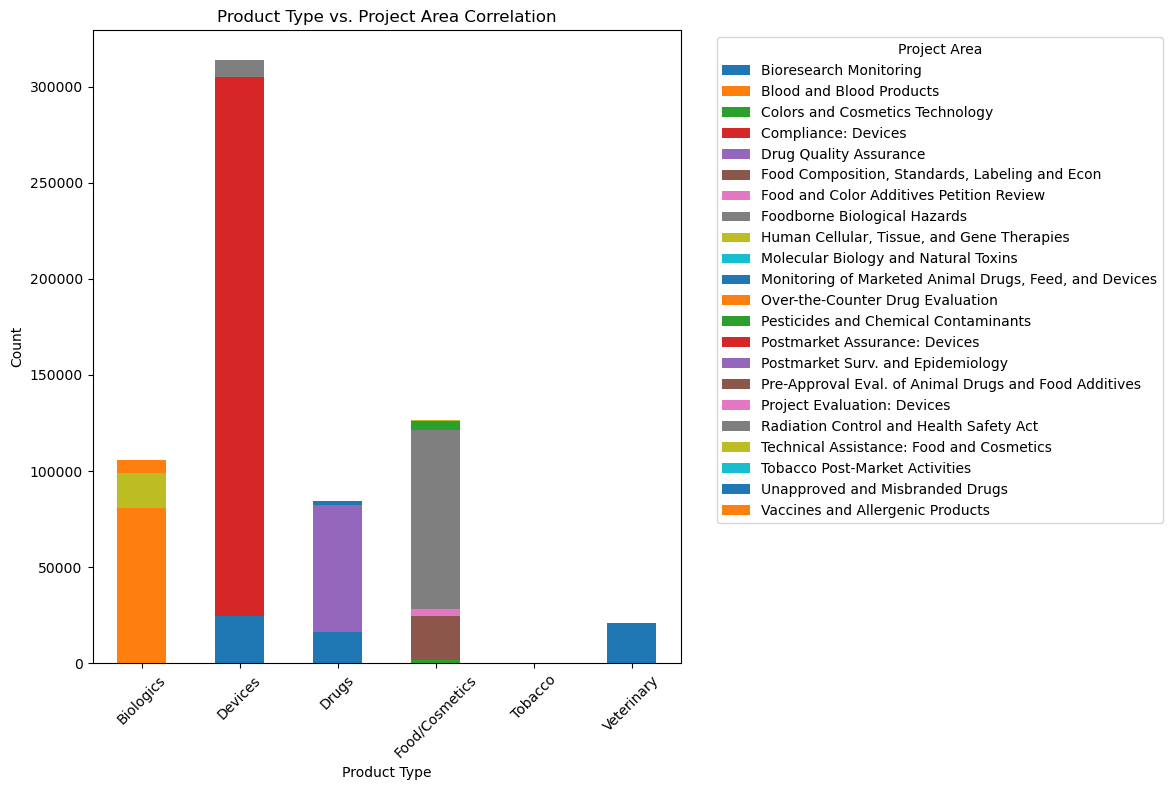

In [24]:
# Create a crosstab to analyze the correlation between 'Product Type_x' and 'Project Area'
# This summarizes the frequency of each 'Product Type_x' in relation to 'Project Area'

product_type_project_area_correlation = pd.crosstab(
    inner_merged_df['Product Type_x'], inner_merged_df['Project Area']
)

product_type_project_area_correlation.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Product Type vs. Project Area Correlation')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.legend(title='Project Area', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Devices dominate inspections, strongly linked to device-specific areas like "Postmarket Assurance."

Food/Cosmetics span diverse areas, reflecting broad regulatory needs.

Biologics are concentrated in specialized areas like "Vaccines."

Tobacco has narrow but targeted inspections in "Tobacco Post-Market Activities."

Veterinary inspections are minimal, focusing on animal drugs and feed.

A strong correlation exists between Product Type and specific Project Areas, particularly for devices, biologics, and food/cosmetics. Each product type aligns with its respective regulatory focus.

In [25]:
left_merged_df = pd.merge(Inspection, Recall, on="FEI Number", how="left") # A left merge keeps all rows from the inspection dataset, adding recall data if available

# Display basic info and a preview of the merged DataFrame
left_merged_df.info(), left_merged_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917617 entries, 0 to 917616
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   FEI Number                  917617 non-null  object        
 1   Legal Name                  917617 non-null  object        
 2   City                        917616 non-null  object        
 3   State                       917617 non-null  object        
 4   Zip                         917617 non-null  object        
 5   Country/Area                917617 non-null  object        
 6   Fiscal Year                 917617 non-null  int64         
 7   Inspection ID               917617 non-null  int64         
 8   Posted Citations            917617 non-null  object        
 9   Inspection End Date         917617 non-null  datetime64[ns]
 10  Classification              917617 non-null  object        
 11  Project Area                917617 non-

(None,
    FEI Number                       Legal Name           City         State  \
 0  3003867915  By George Food Specialties Inc.  Ballston Lake      New York   
 1  3027556847   Mayo Clinic Hospital Rochester      Rochester     Minnesota   
 2  3012992285                 AdventHealth Lab    Celebration       Florida   
 3  3010741116      Purina Animal Nutrition LLC      Camp Hill  Pennsylvania   
 4     2514731        Franklin Feed & Supply Co   Chambersburg  Pennsylvania   
 
      Zip   Country/Area  Fiscal Year  Inspection ID Posted Citations  ...  \
 0  12019  United States         2025        1254941              Yes  ...   
 1  55901  United States         2025        1255020               No  ...   
 2  34747  United States         2025        1255081               No  ...   
 3  17011  United States         2025        1254947               No  ...   
 4  17201  United States         2025        1255013              Yes  ...   
 
   Product Description Event ID Event Cla

**Hypothesis: What percentage of inspected facilities are also involved in recalls?**



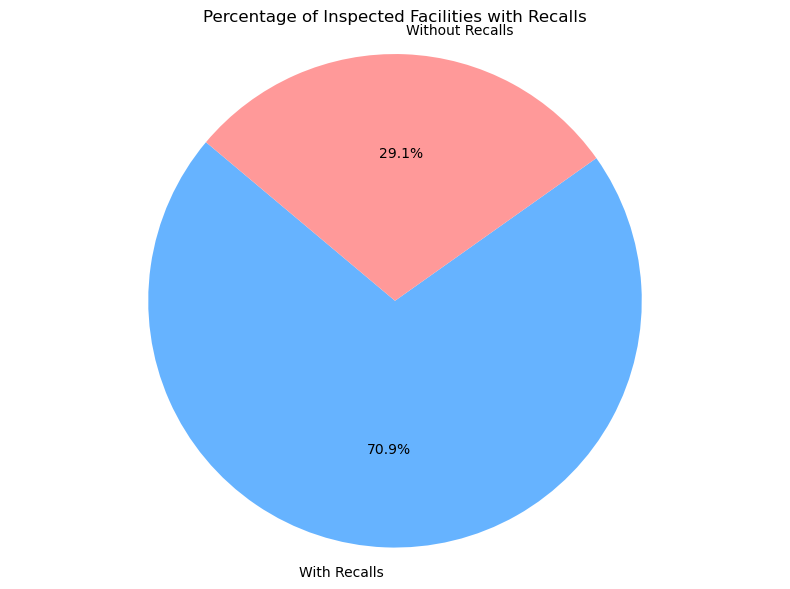

In [26]:
total_facilities = len(left_merged_df) # Calculate the total number of facilities in the dataset
facilities_with_recalls = left_merged_df['Recalling Firm Name'].notna().sum() # Count the number of facilities that have recalls (non-null entries in the 'Recalling Firm Name' column)

percentage_with_recalls = (facilities_with_recalls / total_facilities) * 100 # Calculate the percentage of facilities with recalls


labels = ['With Recalls', 'Without Recalls']
sizes = [facilities_with_recalls, total_facilities - facilities_with_recalls]
colors = ['#66b3ff', '#ff9999']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Inspected Facilities with Recalls')
plt.axis('equal')
plt.tight_layout()
plt.show()

Majority Without Recalls:

Observation: About 70.9% of inspected facilities are not involved in recalls. Most inspections do not uncover issues significant enough to lead to recalls.

Facilities With Recalls:

Observation: Around 29.1% of inspected facilities are linked to recalls. A substantial minority of facilities require recalls, likely due to critical non-compliance or product safety concerns.

While the majority of inspected facilities are not involved in recalls, a significant proportion (nearly 1 in 3) do face recalls, indicating a noteworthy focus on compliance and safety issues during inspections.

**Hypothesis : Are facilities with no recalls associated with specific Project Areas?**

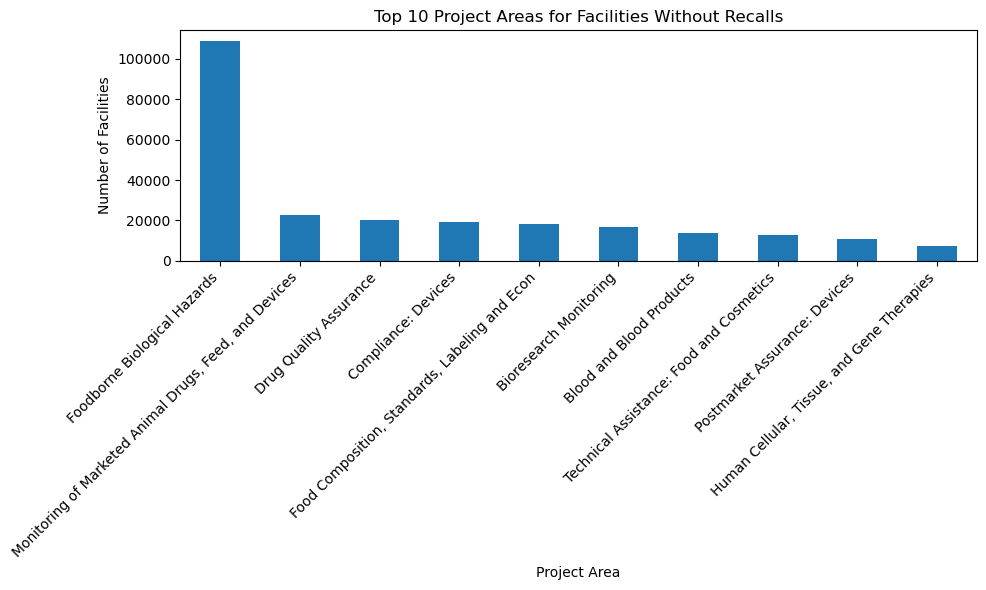

In [27]:
project_area_no_recalls = left_merged_df[left_merged_df['Recalling Firm Name'].isna()]['Project Area'].value_counts()


project_area_no_recalls.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Project Areas for Facilities Without Recalls')
plt.xlabel('Project Area')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Foodborne Biological Hazards dominate with over 100,000 facilities, indicating strong compliance.

Other areas like Drug Quality Assurance and Compliance: Devices show effective monitoring and minimal risks.

Proactive measures in safety and standards likely prevent recalls in these sectors.

The dominance of Foodborne Biological Hazards and other critical areas highlights strong compliance and preventive oversight in facilities without recalls.

In [28]:

right_merged_df = pd.merge(Inspection, Recall, on="FEI Number", how="right") #A right merge keeps all rows from the recall dataset, adding inspection data if available

# Display basic info and a preview of the merged DataFrame
right_merged_df.info(), right_merged_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659841 entries, 0 to 659840
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   FEI Number                  659841 non-null  object        
 1   Legal Name                  650800 non-null  object        
 2   City                        650800 non-null  object        
 3   State                       650800 non-null  object        
 4   Zip                         650800 non-null  object        
 5   Country/Area                650800 non-null  object        
 6   Fiscal Year                 650800 non-null  float64       
 7   Inspection ID               650800 non-null  float64       
 8   Posted Citations            650800 non-null  object        
 9   Inspection End Date         650800 non-null  datetime64[ns]
 10  Classification              650800 non-null  object        
 11  Project Area                650800 non-

(None,
    FEI Number                       Legal Name      City          State  \
 0  3017262132  Grand Central Bakery FRE Co Inc  Portland         Oregon   
 1  3017262132  Grand Central Bakery FRE Co Inc  Portland         Oregon   
 2  3017262132  Grand Central Bakery FRE Co Inc  Portland         Oregon   
 3  3017262132  Grand Central Bakery FRE Co Inc  Portland         Oregon   
 4  3003604053              Smith & Nephew Inc.   Andover  Massachusetts   
 
      Zip   Country/Area  Fiscal Year  Inspection ID Posted Citations  ...  \
 0  97227  United States       2024.0      1250830.0               No  ...   
 1  97227  United States       2024.0      1250830.0               No  ...   
 2  97227  United States       2024.0      1250830.0               No  ...   
 3  97227  United States       2024.0      1250830.0               No  ...   
 4  01810  United States       2022.0      1155885.0               No  ...   
 
                                  Product Description Event ID  \

**Hypothesis :How many recalls occurred in facilities that have no recent inspections?**

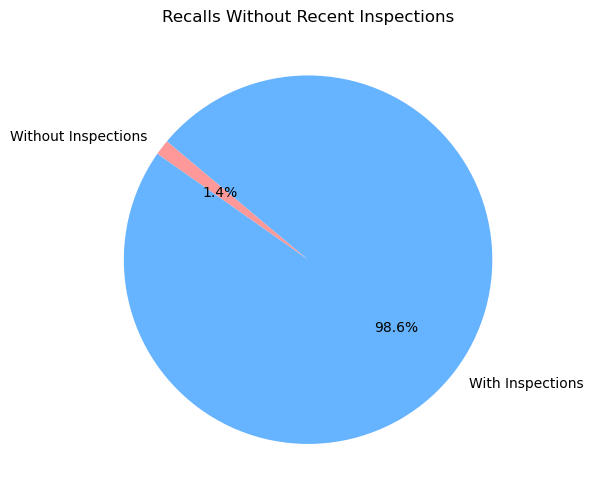

In [29]:
recalls_without_inspections = right_merged_df[right_merged_df['Inspection ID'].isna()].shape[0]
total_recalls = len(right_merged_df)
percentage_without_inspections = (recalls_without_inspections / total_recalls) * 100

plt.figure(figsize=(6, 6))
plt.pie(
    [recalls_without_inspections, total_recalls - recalls_without_inspections],
    labels=["Without Inspections", "With Inspections"],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#ff9999', '#66b3ff'],
)
plt.title("Recalls Without Recent Inspections")
plt.tight_layout()
plt.show()

Majority With Inspections:

98.6% of recalls occurred in facilities with recent inspections. Inspections are highly correlated with identifying and addressing issues leading to recalls.

Minimal Recalls Without Inspections:

Only 1.4% of recalls happened in facilities without recent inspections. Lack of inspections rarely results in recalls, suggesting the importance of ongoing regulatory oversight.

Conclusion:
Facilities with recent inspections account for nearly all recalls, emphasizing the critical role of inspections in identifying risks.

In [30]:
outer_merged_df = pd.merge(Inspection, Recall, on="FEI Number", how="outer") # An outer merge includes all rows from both datasets,

**Hypothesis : Is the geographic distribution of recalls and inspections similar, or do they concentrate in different regions?**

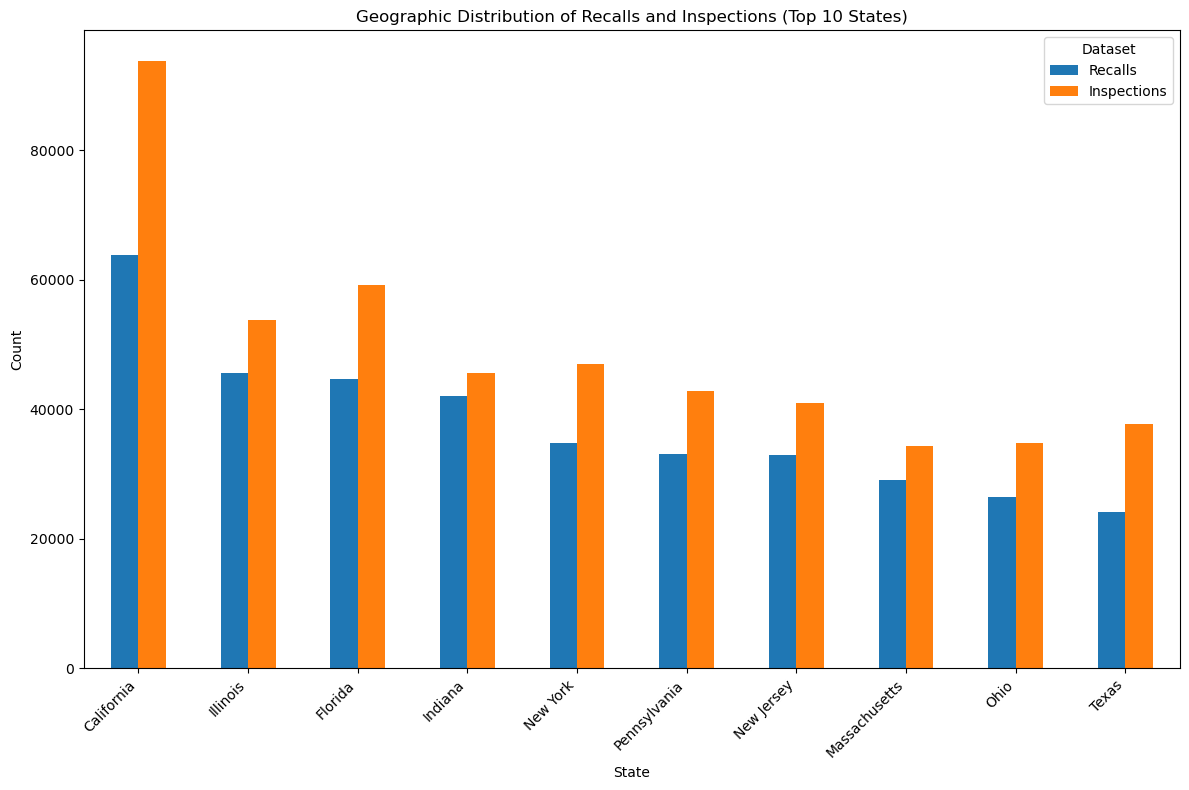

In [31]:
recalls_by_state = outer_merged_df[outer_merged_df['Recalling Firm Name'].notna()]['State'].value_counts()
inspections_by_state = outer_merged_df[outer_merged_df['Inspection ID'].notna()]['State'].value_counts()
geographic_distribution = pd.concat([recalls_by_state, inspections_by_state], axis=1, keys=['Recalls', 'Inspections']).fillna(0)

geographic_distribution.head(10).plot(kind='bar', figsize=(12, 8))
plt.title('Geographic Distribution of Recalls and Inspections (Top 10 States)')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()


California Leads Both:

California has the highest number of recalls and inspections, suggesting a strong regulatory focus in the state. This reflects California's large industrial base and rigorous oversight.

Alignment in Other States:

States like Florida, Illinois, and New York also rank high in both recalls and inspections. A correlation exists between inspection activity and recall frequency in these states.

Slight Variations:

In some states, inspections slightly outnumber recalls, indicating proactive measures to prevent recalls.

Conclusion:

The geographic distribution of recalls and inspections is largely aligned, with high activity in key industrial states like California and New York, indicating inspections often lead to recalls.

**Hypothesis : How do inspection outcomes (e.g., "Voluntary Action Indicated" or "No Action Indicated") correlate with the severity of recall events (e.g., Class I, II, III)?**

   FEI Number              Recalling Firm Name  Product Type_x  \
0  3017262132  Grand Central Bakery FRE Co Inc  Food/Cosmetics   
1  3017262132  Grand Central Bakery FRE Co Inc  Food/Cosmetics   
2  3017262132  Grand Central Bakery FRE Co Inc  Food/Cosmetics   
3  3017262132  Grand Central Bakery FRE Co Inc  Food/Cosmetics   
4  3003604053              Smith & Nephew Inc.         Devices   

  Product Classification   Status  \
0                Class I  Ongoing   
1                Class I  Ongoing   
2                Class I  Ongoing   
3                Class I  Ongoing   
4               Class II  Ongoing   

                                Distribution Pattern Recalling Firm City  \
0                          Distributed in OR and WA.            Portland   
1                          Distributed in OR and WA.            Portland   
2                          Distributed in OR and WA.            Portland   
3                          Distributed in OR and WA.            Portland   


<Figure size 1200x600 with 0 Axes>

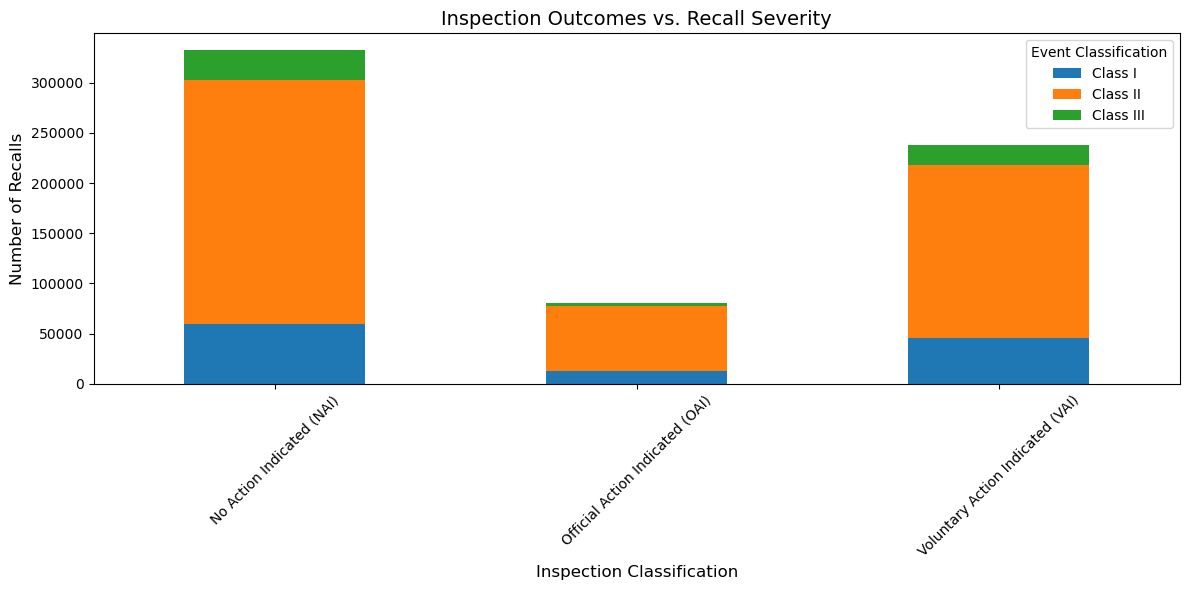

In [32]:
# Merge the datasets on the 'FEI Number' column
merged_df = pd.merge(Recall, Inspection, on='FEI Number', how='inner')

# Inspect the merged DataFrame
merged_df_sample = merged_df.head()
print(merged_df_sample)

# Drop rows with missing values in key columns
merged_df_clean = merged_df.dropna(subset=['Classification', 'Event Classification', 'State',
                                           'Product Type_x', 'Fiscal Year', 'Inspection End Date',
                                           'Project Area', 'Reason for Recall'])

inspection_recall_severity = merged_df_clean.groupby(['Classification', 'Event Classification']).size().unstack()

plt.figure(figsize=(12, 6))
inspection_recall_severity.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Inspection Outcomes vs. Recall Severity', fontsize=14)
plt.xlabel('Inspection Classification', fontsize=12)
plt.ylabel('Number of Recalls', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Event Classification', fontsize=10)
plt.tight_layout()
plt.show()


NAI is the most frequent inspection outcome, even for moderate-risk recalls (Class II) and some serious recalls (Class I).

OAI is primarily associated with severe recalls (Class I), showing a focused regulatory response to critical health risks.

Voluntary actions (VAI) address a broad spectrum of issues, reflecting proactive measures taken by manufacturers to mitigate risks.

Class II recalls dominate the recall landscape, requiring varying levels of intervention depending on the inspection classification.

**Hypothesis : Are products in certain categories more likely to result in severe recall classifications based on the inspection findings?**

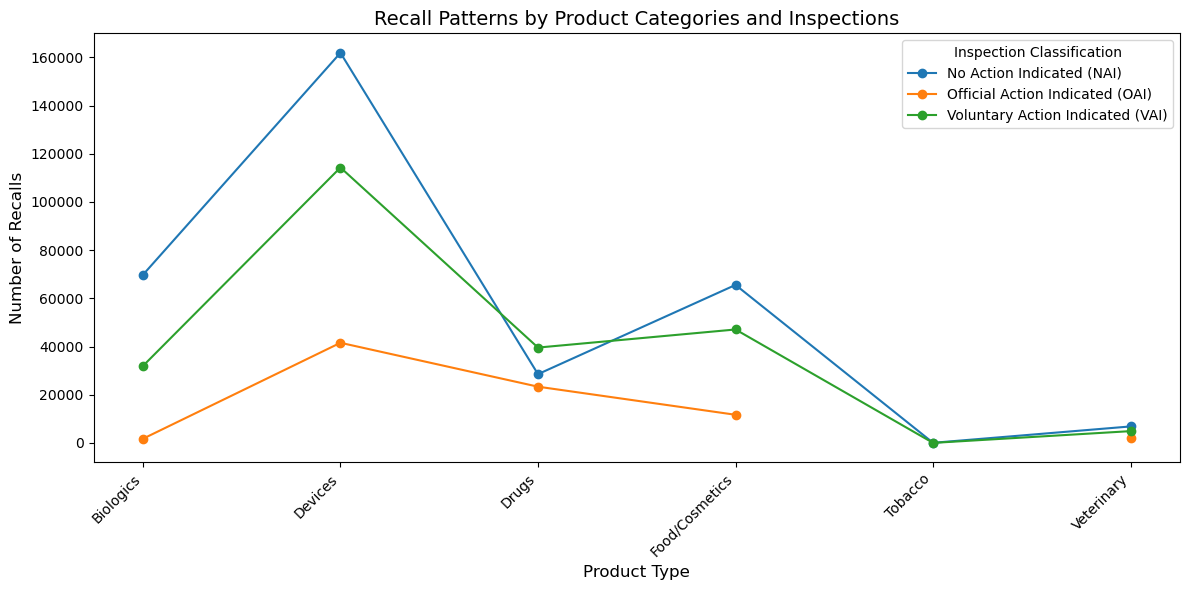

In [33]:
recalls_by_product_inspection = merged_df_clean.groupby(['Product Type_x', 'Classification']).size().unstack()

plt.figure(figsize=(12, 6))

for classification in recalls_by_product_inspection.columns:
    plt.plot(
        recalls_by_product_inspection.index,
        recalls_by_product_inspection[classification],
        marker='o',
        label=classification
    )

plt.title('Recall Patterns by Product Categories and Inspections', fontsize=14)
plt.xlabel('Product Type', fontsize=12)
plt.ylabel('Number of Recalls', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Inspection Classification', fontsize=10)
plt.tight_layout()
plt.show()


Devices Dominate Severe Classifications:
 Devices have the highest number of recalls across all inspection classifications, particularly in "No Action Indicated" (NAI) and "Voluntary Action Indicated" (VAI). The critical nature of devices in healthcare likely drives heightened scrutiny.

Biologics and Drugs Show Moderate Recall Levels: Biologics and Drugs exhibit consistent recall counts, with a higher share of VAI classifications. These categories face moderate risk but often allow voluntary corrective actions.

Food/Cosmetics and Tobacco Have Minimal Severe Actions: Recalls in these categories are low, especially for "Official Action Indicated" (OAI) classifications. These product types generally face less severe regulatory findings.

Conclusion:
Devices are most prone to recalls and severe classifications, highlighting their critical role in safety. Other categories like Food/Cosmetics and Tobacco face fewer severe outcomes.

**Hypothesis : Does the timing of inspections affect the likelihood of recalls in the same fiscal year or subsequent years?**

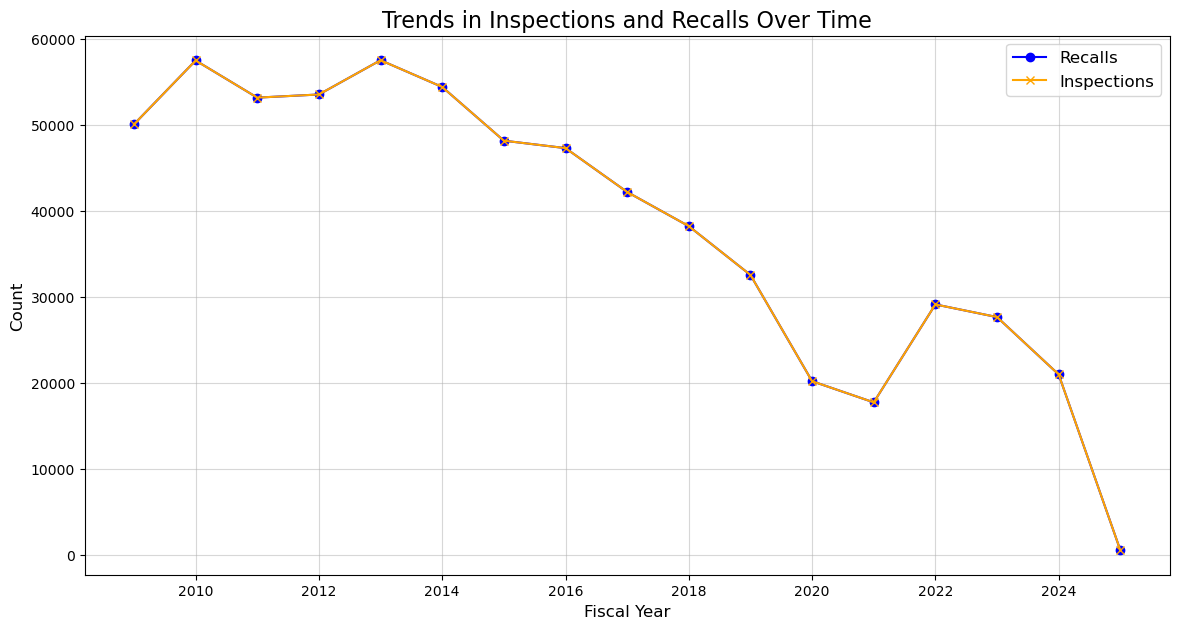

In [34]:
# Grouping the data to calculate the count of recalls and inspections by fiscal year
recalls_by_year = merged_df_clean.groupby('Fiscal Year')['Event ID'].count()
inspections_by_year = merged_df_clean.groupby('Fiscal Year')['Inspection ID'].count()

plt.figure(figsize=(14, 7))

# Plot recalls
plt.plot(recalls_by_year, label='Recalls', marker='o', linestyle='-', color='blue')

# Plot inspections
plt.plot(inspections_by_year, label='Inspections', marker='x', linestyle='-', color='orange')

# Adding titles and labels
plt.title('Trends in Inspections and Recalls Over Time', fontsize=16)
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(fontsize=12)

# Adding grid for better readability
plt.grid(alpha=0.5)

# Display the plot
plt.show()


Decline Over Time: Both inspections and recalls have significantly decreased from 2010 to 2024, indicating improved compliance or streamlined regulations.

Aligned Trends: Recalls closely follow inspection patterns, showing a direct influence.

Post-2020 Fluctuations: Temporary increases in 2022, followed by a sharp decline, may reflect external factors like policy changes or the pandemic.